# Download and explore the data

Outline
1. Download dataset from kaggle
2. Explore the dataset and visualize

In [ ]:
import pandas as pd

In [ ]:
train_df=pd.read_csv('/content/twitter_training.csv',names=['id','information','sentiment','text'])

In [ ]:
train_df

,id,information,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
23999,4513,Google,Neutral,"A truly incredible game. Gaming is the ""show o..."
24000,4514,Google,Neutral,“Android Becomes Basically Unusable If You Tur...
24001,4514,Google,Neutral,"""Android basically becomes useless if you turn..."
24002,4514,Google,Neutral,"""Android Becomes the Unusable If You Turn Off ..."


In [ ]:
validation_df=pd.read_csv('/content/twitter_validation.csv',names=['id','information','sentiment','text'])

In [ ]:
validation_df

,id,information,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


# Data Cleaning

In [ ]:
train_df.dtypes

id              int64
information    object
sentiment      object
text           object
dtype: object

In [ ]:
train_df.isnull().sum()

id               0
information      0
sentiment        0
text           220
dtype: int64

In [ ]:
validation_df.isnull().sum()

id             0
information    0
sentiment      0
text           0
dtype: int64

We have 686 rows with no text , we are going to remove those columns, as text is very crucial for analysis

In [ ]:
train_df.dropna(inplace=True,axis=0)

In [ ]:
texts=train_df['text']

In [ ]:
length_text=[len(t.split()) for t in texts.values]

In [ ]:
import seaborn as sns

<Axes: >

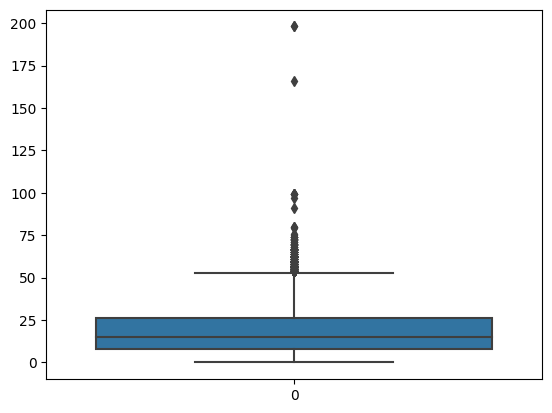

In [ ]:
sns.boxplot(length_text)

We can observe there are some extreme outliers in the train data

In [ ]:
import numpy as np

In [ ]:
extreme_outliers=train_df[np.array(length_text)>125]

In [ ]:
type(extreme_outliers)

pandas.core.frame.DataFrame

In [ ]:
extreme_outliers

,id,information,sentiment,text
1826,2720,Borderlands,Neutral,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...
8546,9466,Overwatch,Positive,I REALLY HAVE THE OVERWATCH RN GAME. SEA SEA S...
10454,12999,Xbox(Xseries),Positive,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...


In [ ]:
outliers=train_df[np.array(length_text)>60]

In [ ]:
outliers

,id,information,sentiment,text
124,2421,Borderlands,Positive,Finally played through borderlands 3. The actu...
268,2445,Borderlands,Irrelevant,4 My favorite games of all time. ( thanks @317...
334,2456,Borderlands,Neutral,"Lee Hey borderlands mutuals fam, sorry I've no..."
442,2474,Borderlands,Neutral,Idk how I'ya m gonna do this online class shit...
574,2499,Borderlands,Neutral,i kno The borderlands handled zer0 only being ...
...,...,...,...,...
23752,4470,Google,Irrelevant,"This is my 143rd twitter account, I keep getti..."
23800,4478,Google,Irrelevant,i honestly feel like i'm already failing schoo...
23914,4499,Google,Neutral,Smart video assistant helping out while car yo...
23920,4500,Google,Irrelevant,""" AI, smart phones and good social media, peop..."


# Visualizing the data

In [ ]:
import matplotlib.pyplot as plt

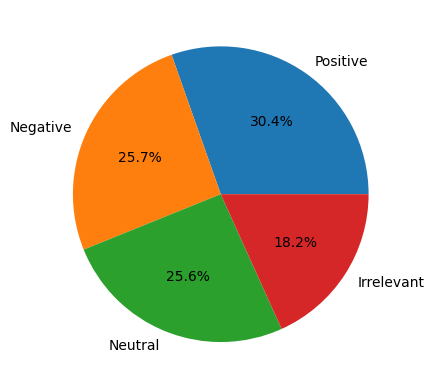

In [ ]:
sentiment_counts=train_df.sentiment.value_counts()
sentiment_labels=sentiment_counts.index
plt.pie(sentiment_counts,labels=sentiment_labels,autopct='%1.1f%%')
plt.show()

To identify main words as label, here we are using word_cloud to see important words as per sentiment

In [ ]:
from wordcloud import WordCloud

In [ ]:
word_sentence=''.join(train_df[train_df["sentiment"]=="Positive"].text)

In [ ]:
wordcloud=WordCloud(max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800).generate(word_sentence)

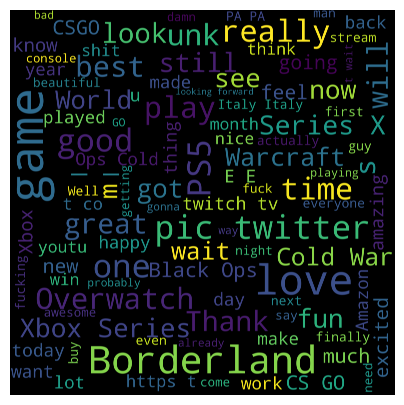

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Negative words
word_sentence=''.join(train_df[train_df["sentiment"]=="Negative"].text)

In [ ]:
wordcloud=WordCloud(max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800).generate(word_sentence)

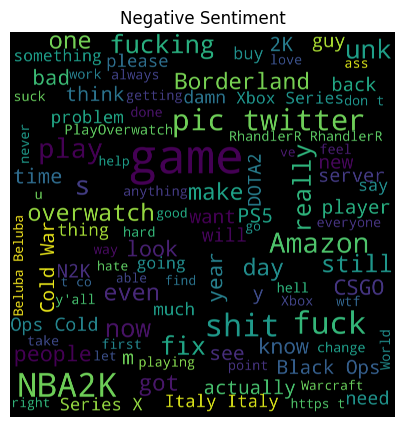

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment")
plt.show()

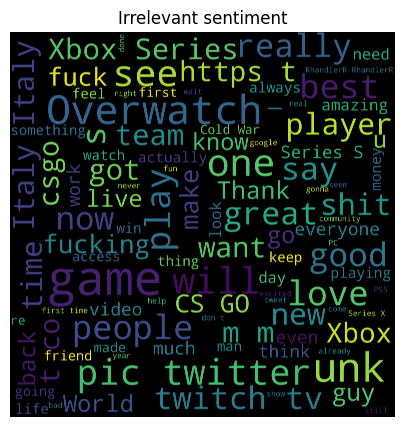

In [ ]:
# irrelevant 
word_sentence=''.join(train_df[train_df["sentiment"]=="Irrelevant"].text)
wordcloud=WordCloud(max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800).generate(word_sentence)
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Irrelevant sentiment")
plt.show()

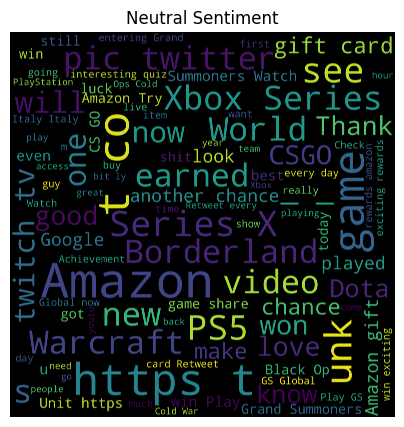

In [ ]:
word_sentence=''.join(train_df[train_df["sentiment"]=="Neutral"].text)
wordcloud=WordCloud(max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800).generate(word_sentence)
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral Sentiment")
plt.show()

In [ ]:
import nltk

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train_df.text[0]

'im getting on borderlands and i will murder you all ,'

In [ ]:
word_tokenize(train_df.text[0])

['im',
 'getting',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'murder',
 'you',
 'all',
 ',']

In [ ]:
train_df[train_df.sentiment=="Negative"].text[:10]

24    the biggest dissappoinment in my life came out...
25    The biggest disappointment of my life came a y...
26    The biggest disappointment of my life came a y...
27    the biggest dissappoinment in my life coming o...
28    For the biggest male dissappoinment in my life...
29    the biggest dissappoinment in my life came bac...
36    Man Gearbox really needs to fix this dissapoin...
37    Man Gearbox really needs to fix these disappoi...
38    Man Gearbox really needs to fix this disssapoi...
39    Man Bethesda really needs to fix this dissapoi...
Name: text, dtype: object

In [ ]:
train_df["lower_text"]=train_df.text.str.lower()

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_list=stopwords.words('english')

In [ ]:
def tokenize(text):
  return [word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stopwords_list]

In [ ]:
tokenize("i havent been here since 2012")

['havent', 'since']

In [ ]:
bar_graph_Sentence=[]

In [ ]:
for texts in train_df[train_df.sentiment=='Positive']['text']:
  final_text=tokenize(texts)
  bar_graph_Sentence.extend(final_text)

In [ ]:
information=pd.Series(bar_graph_Sentence).value_counts()[:25]

Text(0.5, 1.0, 'Positive sentiment')

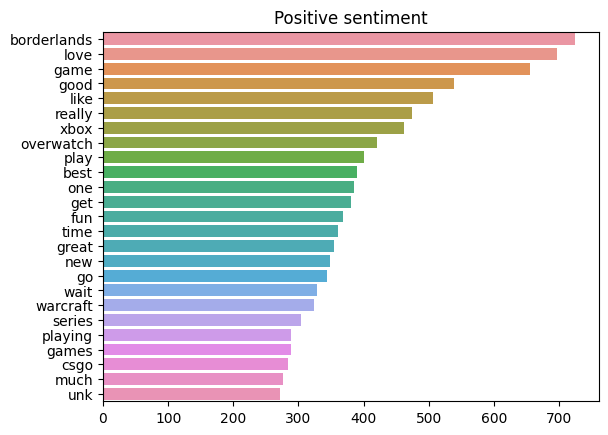

In [ ]:
sns.barplot(x=information.values,y=information.index)
plt.title("Positive sentiment")

In positive we can see top words are love, good, like, really, new,best.In negative, we can see lot of bad words. In neutral sentences, some words are positive, some are just names, whch does not give any sentiment.

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test=train_test_split(train_df,test_size=0.2,random_state=0)

In [ ]:
y_train=X_train['sentiment']
y_test=X_test['sentiment']

In [ ]:
val_inputs=vectorizer.transform(validation_df.text)

In [ ]:
val_inputs

<1000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 8134 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_counts = CountVectorizer(
    tokenizer=tokenize,
    ngram_range=(1,4)
)

In [ ]:
X_train_inputs=bow_counts.fit_transform(X_train.text)
X_test_inputs=bow_counts.transform(X_test.text)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
val_inputs=bow_counts.transform(validation_df.text)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train_inputs,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
train_preds=model.predict(X_train_inputs)

In [ ]:
pd.Series(train_preds).value_counts()

Positive      6324
Negative      4740
Neutral       4723
Irrelevant    3240
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_train,train_preds)

0.9657329058706049

In [ ]:
test_preds=model.predict(X_test_inputs)

In [ ]:
accuracy_score(y_test,test_preds)

0.8831196132015976

In [ ]:
val_preds=model.predict(val_inputs)

In [ ]:
accuracy_score(validation_df.sentiment,val_preds)

0.63

# XGBoost approach

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
train_df_num=le.fit_transform(y_train)
test_df_num=le.transform(y_test)

In [ ]:
val_df_num=le.transform(validation_df.sentiment)

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
xgb_cl=xgb.XGBClassifier(objective="multi:softmax",n_estimators=1000,colsample_bytree=0.6, subsample=0.6)

In [ ]:
xgb_cl.fit(X_train_inputs,train_df_num)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [ ]:
xgb_cl_train_preds=xgb_cl.predict(X_train_inputs)

In [ ]:
accuracy_score(train_df_num,xgb_cl_train_preds)

0.9458664003784096

In [ ]:
val_preds_xgb=xgb_cl.predict(val_inputs)

In [ ]:
test_preds_xgb=xgb_cl.predict(X_test_inputs)

In [ ]:
accuracy_score(test_df_num,test_preds_xgb)

0.8505360521336978

In [ ]:
accuracy_score(val_df_num,val_preds_xgb)

0.61

## Future Work

Future Work can be improvement of accuracy and additional EDA analysis and trying different ML models